In [ ]:
!pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import SGD
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from google.colab.patches import cv2_imshow
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model
from sklearn.utils.multiclass import unique_labels
import seaborn as sn


#IMPORTANDO DADOS

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
resultados = []

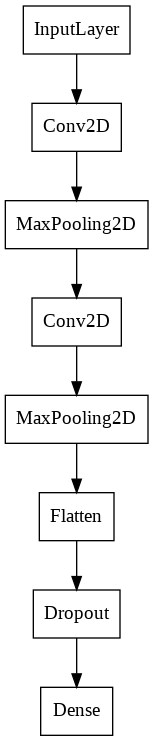

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
plot_model(model, to_file='modelo1.png', show_shapes=False, show_layer_names=False)

#MODELO 1

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
  
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/20
1688/1688 [==============================] - 18s 4ms/step - loss: 0.5360 - accuracy: 0.8285 - val_loss: 0.1179 - val_accuracy: 0.9707
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2405 - accuracy: 0.9267 - val_loss: 0.0872 - val_accuracy: 0.9760
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2084 - accuracy: 0.9365 - val_loss: 0.0797 - val_accuracy: 0.9800
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1923 - accuracy: 0.9407 - val_loss: 0.0702 - val_accuracy: 0.9817
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1741 - accuracy: 0.9466 - val_loss: 0.0614 - val_accuracy: 0.9838
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1647 - accuracy: 0.9495 - val_loss: 0.0658 - val_accuracy: 0.9813
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1563 - accuracy: 0.9512 - val_loss: 0.0603 - val_accuracy

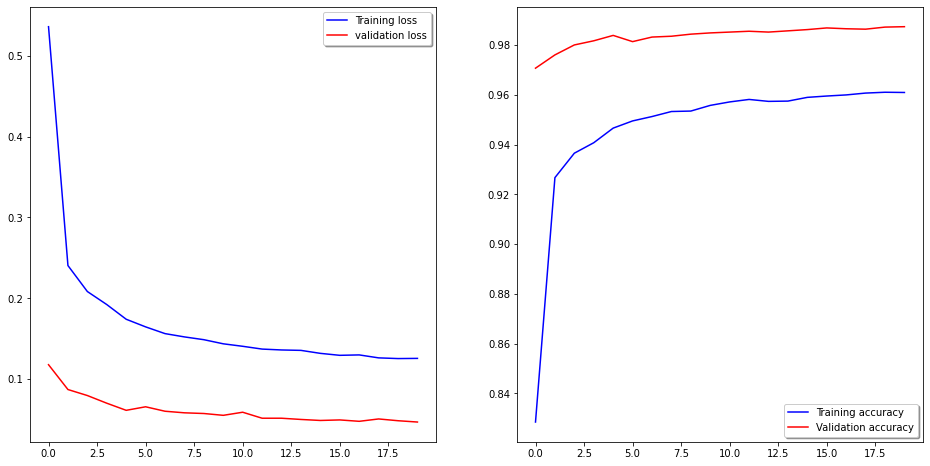

In [ ]:
model, history = train()

In [ ]:
resultados.append([model, history])

#MODELO 2

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2687 - accuracy: 0.9147 - val_loss: 0.0604 - val_accuracy: 0.9847
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1060 - accuracy: 0.9665 - val_loss: 0.0486 - val_accuracy: 0.9867
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.0363 - val_accuracy: 0.9888
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0362 - val_accuracy: 0.9907
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0335 - val_accuracy: 0.9905
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0331 - val_accuracy:

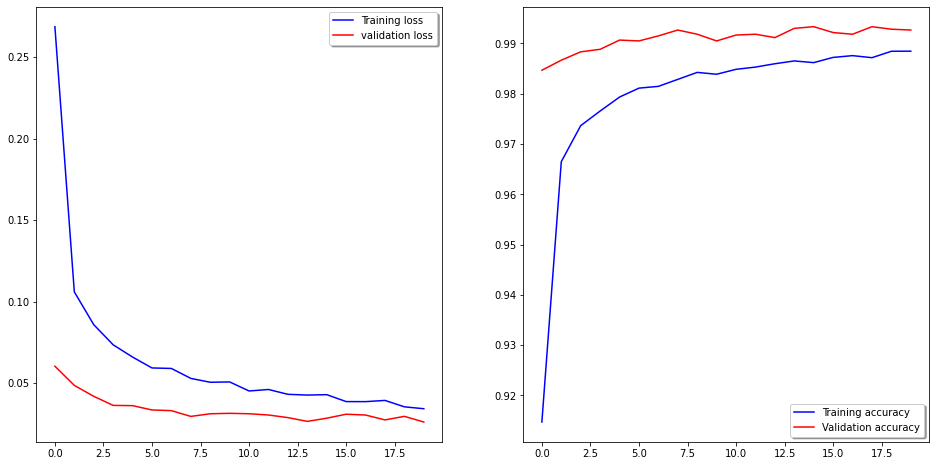

In [ ]:
model, history = train()

In [ ]:
resultados.append([model, history])

#MODELO 3

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2066 - accuracy: 0.9351 - val_loss: 0.0541 - val_accuracy: 0.9828
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0398 - val_accuracy: 0.9900
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.0355 - val_accuracy: 0.9910
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0314 - val_accuracy: 0.9910
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0294 - val_accuracy: 0.9918
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0316 - val_accuracy:

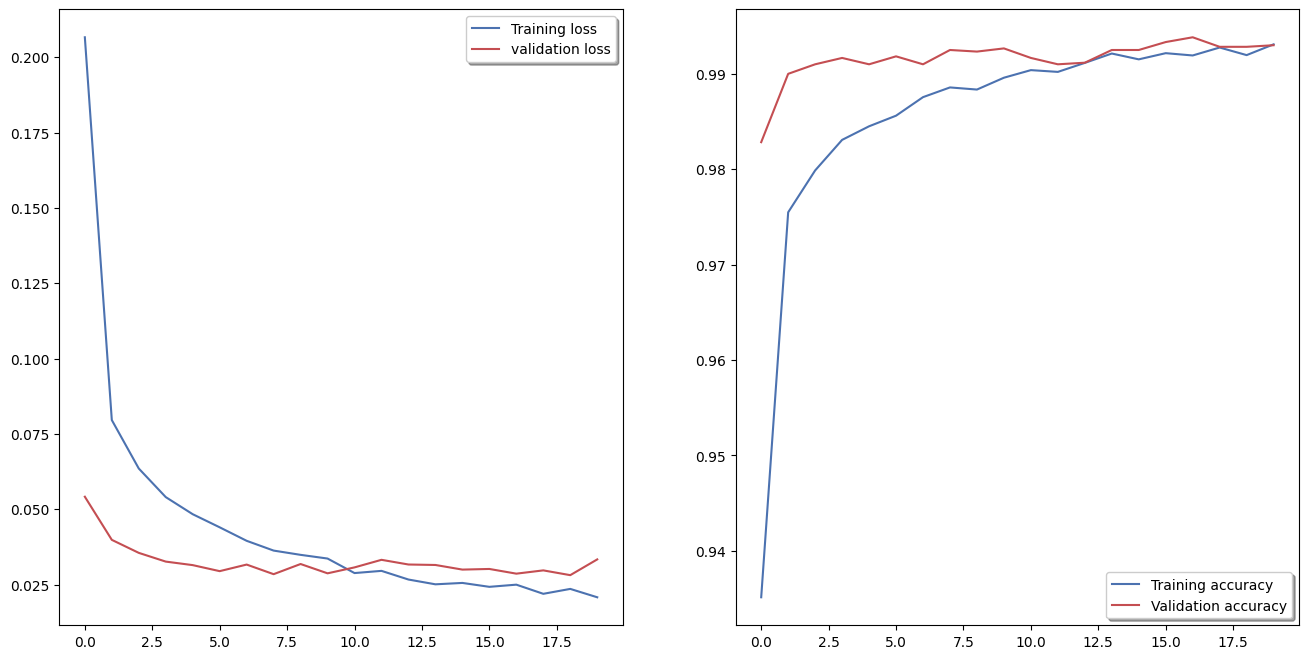

In [ ]:
model, history = train()

In [ ]:
resultados.append([model, history])

#MODELO 4

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/20
1688/1688 [==============================] - 30s 11ms/step - loss: 0.1346 - accuracy: 0.9576 - val_loss: 0.0487 - val_accuracy: 0.9863
Epoch 2/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0329 - val_accuracy: 0.9883
Epoch 3/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 4/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0351 - val_accuracy: 0.9902
Epoch 5/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 6/20
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0298 - val_accuracy: 0.9912
Epoch 7/20
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0317 -

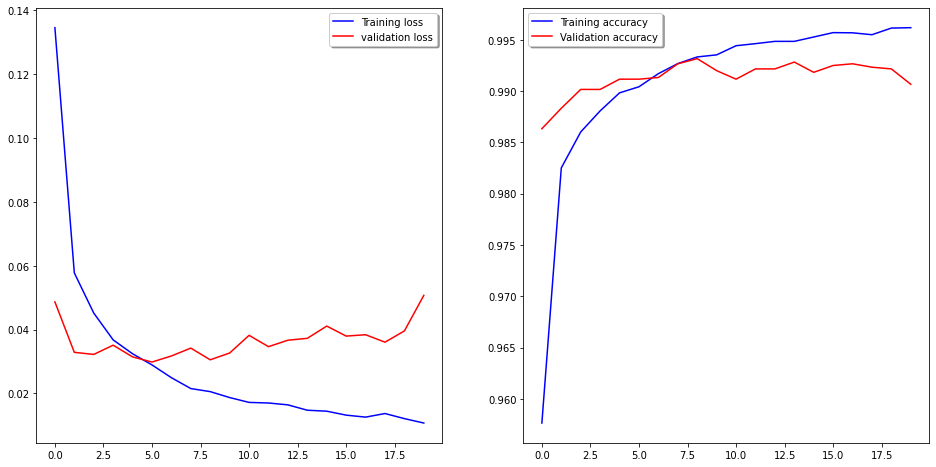

In [ ]:
model, history = train()

In [ ]:
resultados.append([model, history])

#MODELO 5

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1071 - accuracy: 0.9672 - val_loss: 0.0427 - val_accuracy: 0.9880
Epoch 2/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 3/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 4/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0410 - val_accuracy: 0.9903
Epoch 5/20
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0493 - val_accuracy: 0.9897
Epoch 6/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0438 - val_accuracy: 0.9913
Epoch 7/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0464 -

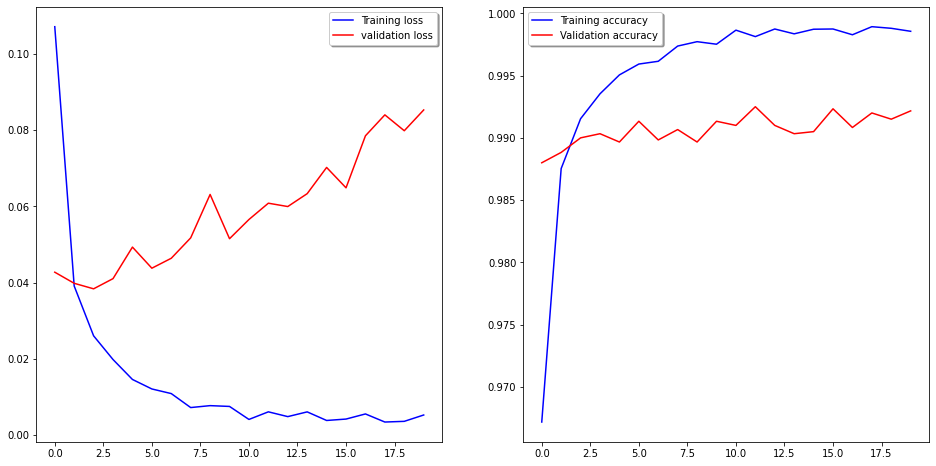

In [ ]:
model, history = train()

In [ ]:
resultados.append([model, history])

#GRÁFICOS

In [ ]:
colors = ['red', 'blue', 'yellow', 'orange', 'purple']

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

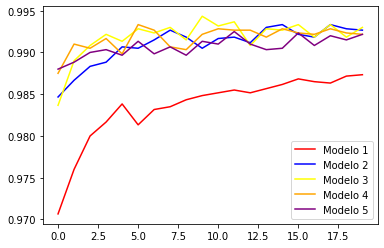

In [ ]:
for i in range(len(resultados)):
  aux = resultados[i][1]
  aux = aux.history['val_accuracy']
  plt.plot(aux, color=colors[i], label='Modelo '+ str(i+1))
plt.legend()
plt.show()

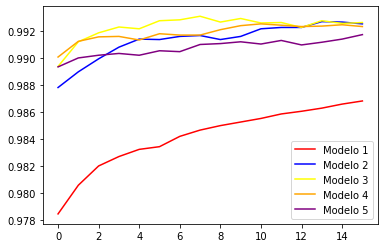

In [ ]:
for i in range(len(resultados)):
  aux = resultados[i][1]
  aux = moving_average(aux.history['val_accuracy'], n=5)
  plt.plot(aux, color=colors[i], label='Modelo '+ str(i+1))
plt.legend()
plt.show()

#TREINANDO O MODELO 3 E O MODELO 4 POR MAIS EPOCAS

In [ ]:
top2 = []

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2032 - accuracy: 0.9370 - val_loss: 0.0521 - val_accuracy: 0.9850
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0782 - accuracy: 0.9754 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9835 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0295 - val_accuracy: 0.9922
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0298 - val_accuracy: 0.9918
Epoch 7/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0304 - val_accuracy:

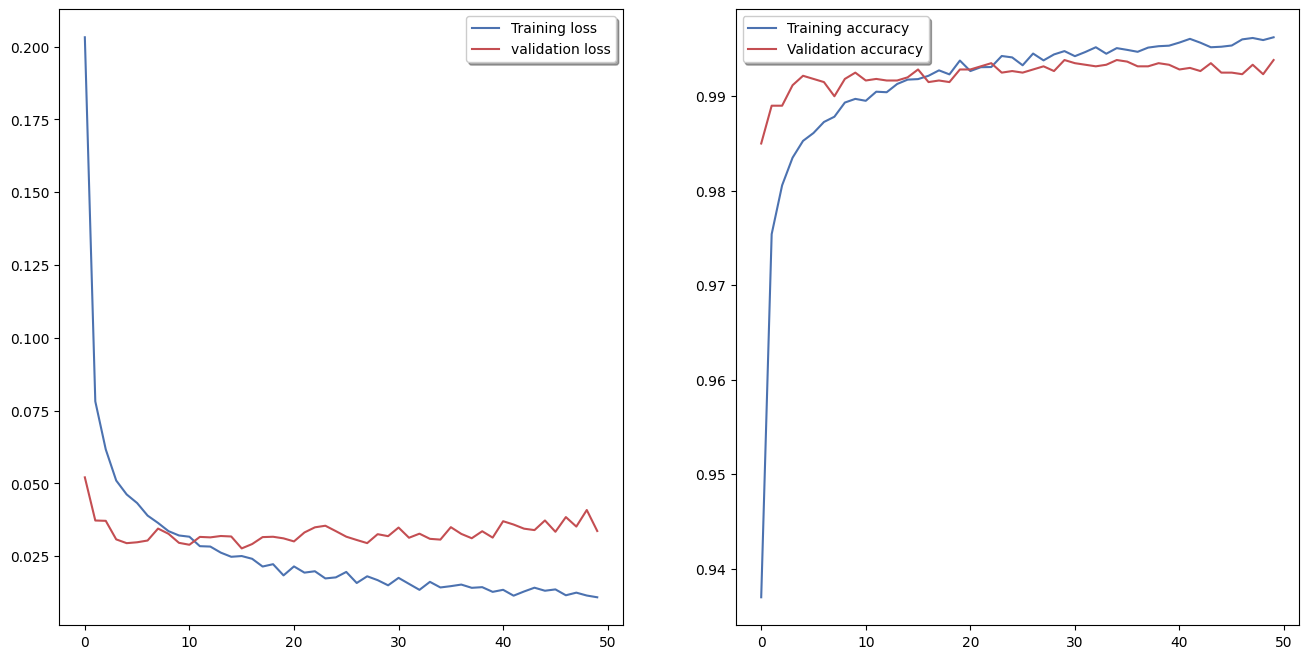

In [ ]:
model, history = train(epochs=50)

In [ ]:
top2.append([model, history])

In [ ]:
def train(momentum=0, epochs=20, batch_size=32):
  model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_accuracy'][-1])
  return model, history

Epoch 1/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.1349 - accuracy: 0.9569 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 2/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 3/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0329 - val_accuracy: 0.9897
Epoch 4/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0310 - val_accuracy: 0.9923
Epoch 5/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0320 - val_accuracy: 0.9913
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0309 - val_accuracy: 0.9915
Epoch 7/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0306 -

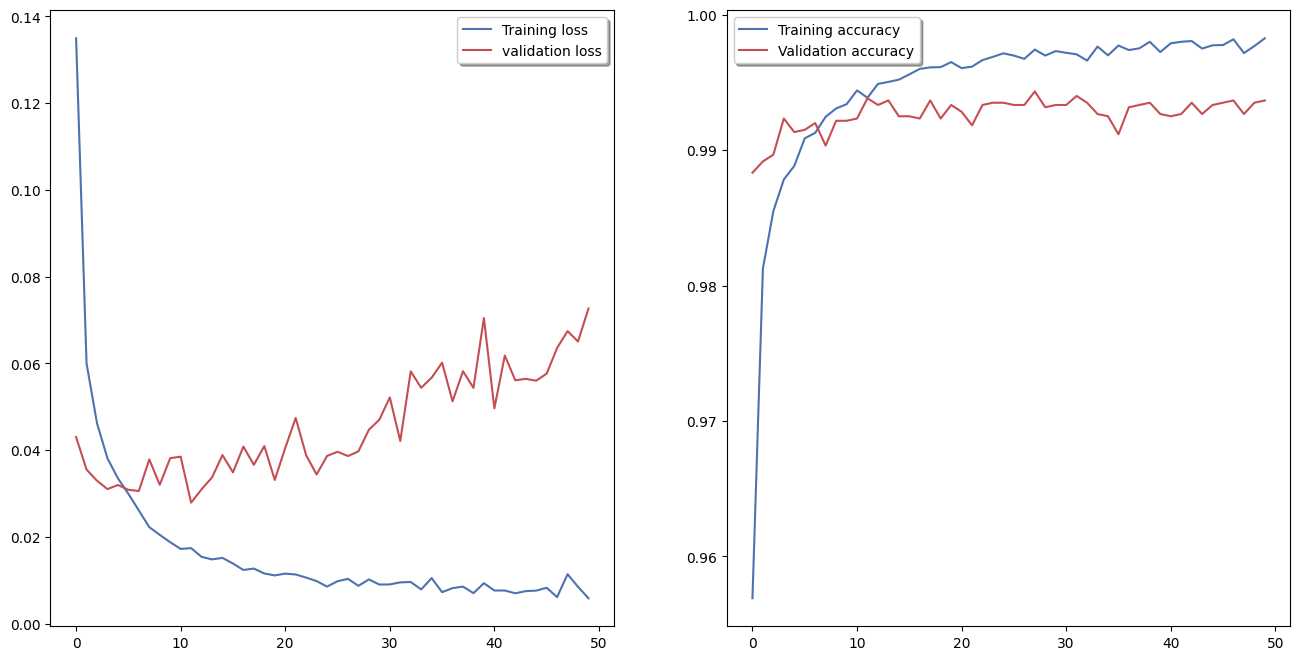

In [ ]:
model, history = train(epochs=50)

In [ ]:
top2.append([model, history])

In [ ]:
colors2 = ['yellow', 'orange']

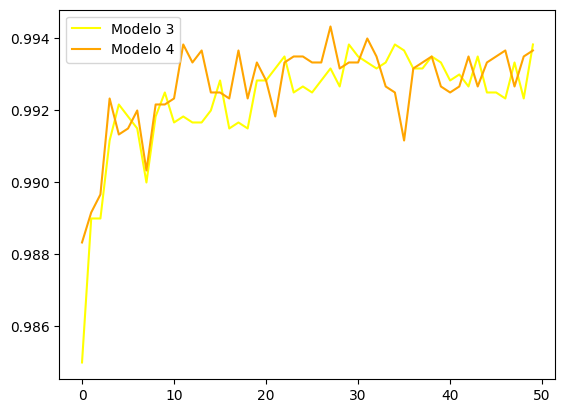

In [ ]:
for i in range(len(top2)):
  aux = top2[i][1]
  aux = aux.history['val_accuracy']
  plt.plot(aux, color=colors2[i], label='Modelo '+ str(i+3))
plt.legend()
plt.show()

In [ ]:
for i in range(len(top2)):
  aux = top2[i][1]
  aux = moving_average(aux.history['val_accuracy'], n=5)
  plt.plot(aux, color=colors2[i], label='Modelo '+ str(i+3))
plt.legend()
plt.show()

NameError: ignored

#IMPORTANDO MODELO MLP

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MLPmodel = keras.models.load_model('/content/drive/MyDrive/modelo7-100')

In [ ]:
MLPx_test = []
for i in range(len(x_test)):
  MLPx_test.append(x_test[i].reshape(784))

In [ ]:
MLPy_pred = MLPmodel.predict(np.array(MLPx_test))

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(len(MLPx_test))

10000


In [ ]:
scores = MLPmodel.evaluate(np.array(MLPx_test), y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9886

accuracy: 98.86%


In [ ]:
for i in range(len(MLPy_pred)):
  MLPy_pred[i] = list([round(x) for x in MLPy_pred[i]])

In [ ]:
cm1 = confusion_matrix(y_true = y_test.argmax(axis=1), y_pred = MLPy_pred.argmax(axis=1))

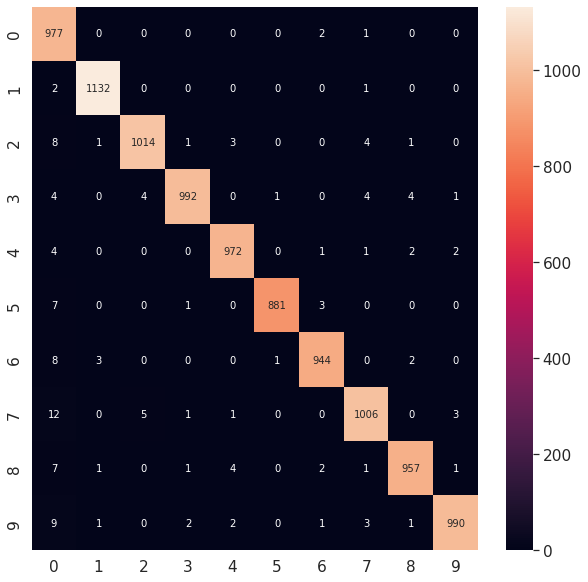

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(10), range(10))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm1, annot=True, annot_kws={"size": 10}, fmt='g') # font size

plt.show()

#CONFUSION MATRIX DO MODELO CNN

In [ ]:
CNNmodel = resultados[0][0]

In [ ]:
y_pred = CNNmodel.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
for i in range(len(y_pred)):
  y_pred[i] = [round(x) for x in y_pred[i]]

In [ ]:
scores = CNNmodel.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0438 - accuracy: 0.9912

accuracy: 99.12%


In [ ]:
cm2 = confusion_matrix(y_true = y_test.argmax(axis=1), y_pred = y_pred.argmax(axis=1))

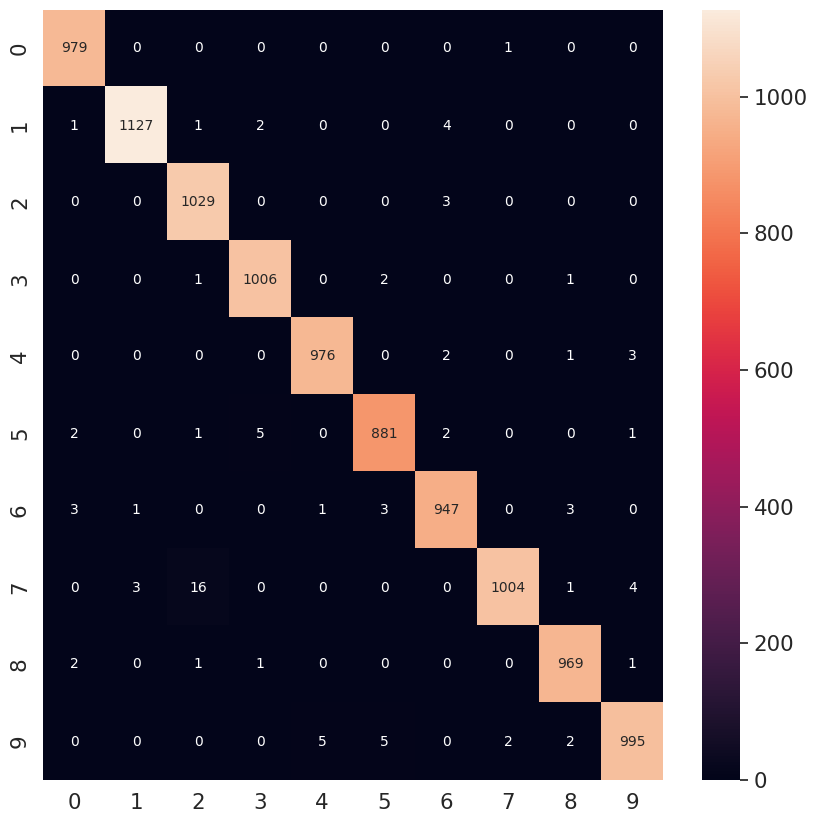

In [ ]:
df_cm2 = pd.DataFrame(cm2, range(10), range(10))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm2, annot=True, annot_kws={"size": 10}, fmt='g') # font size

plt.show()

In [ ]:
aux = cm2 - cm1

In [ ]:
df_cm3 = pd.DataFrame(aux, range(10), range(10))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm3, annot=True, annot_kws={"size": 10}, fmt='g') # font size

plt.show()

TypeError: ignored

<Figure size 1000x1000 with 0 Axes>

#APLICANDO RUIDO GAUSSIANO NAS IMAGENS

In [ ]:
from google.colab.patches import cv2_imshow

#CALCULANDO A ACURACIA NOS MODELOS MLP E CNN

In [ ]:
def MLPRuido(r):
  noisex_test = []
  for i in range(len(x_test)):
    aux = np.array(x_test[i]).reshape(784) + np.random.normal(0, r, 784)
    aux = [x if x >= 0 else 0 for x in aux]
    aux = np.array(aux)
    noisex_test.append(aux)
  scores = MLPmodel.evaluate(np.array(noisex_test), y_test)
  return scores[1] * 100

In [ ]:
def CNNRuido(r):
  noisex_test = []
  for i in range(len(x_test)):
    aux = np.array(x_test[i]).reshape(784) + np.random.normal(0, r, 784)
    aux = [x if x >= 0 else 0 for x in aux]
    aux = np.array(aux).reshape(28, 28)
    aux = np.expand_dims(aux, -1)
    noisex_test.append(aux)
  scores = CNNmodel.evaluate(np.array(noisex_test), y_test)
  return scores[1] * 100

In [ ]:
resultadosMLP = []
resultadosCNN = []

In [ ]:
for i in range(20):
  resultadosMLP.append(MLPRuido(i / 20))
  resultadosCNN.append(CNNRuido(i / 20))

313/313 [==============================] - 2s 5ms/step - loss: 12.0705 - accuracy: 0.1674


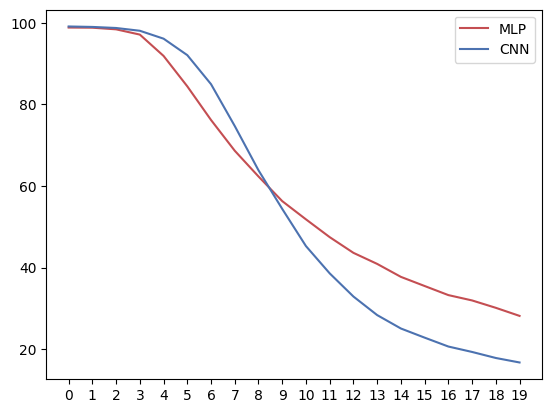

In [ ]:
plt.style.use('default')
plt.plot(resultadosMLP, color='r', label='MLP')
plt.plot(resultadosCNN, color='b', label='CNN')
plt.legend()
plt.xticks([x for x in range(20)])
plt.show()

#IMGENS COM RUIDO

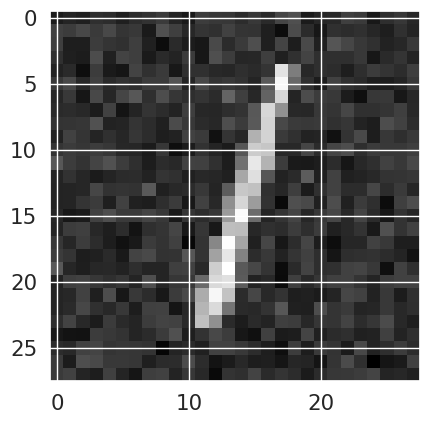

In [ ]:
for i in range(3):
  aux = np.array(x_test[i]).reshape(784)
  noise = np.random.normal(0, 0.1, 784)
  aux += noise
  aux = aux.reshape((28, 28))
  plt.imshow(aux, cmap='gray')r

#APLICANDO FILTRO PASSA BAIXA DE MÉDIA NAS IMAGENS COM RUIDO GAUSSIANO


In [ ]:
import cv2

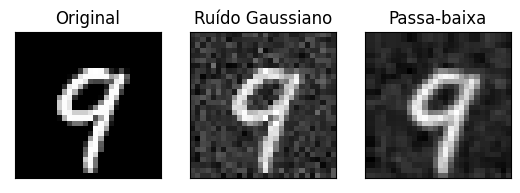

In [ ]:
img = np.array(x_test[12])
temp1 = np.array(img).reshape((28,28))
img = img.reshape(784)
img += np.random.normal(0, 0.1, 784)
img = img.reshape((28, 28))

kernel = np.ones((2, 2),np.float32)/4
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(131),plt.imshow(temp1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img, cmap='gray'),plt.title('Ruído Gaussiano')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dst, cmap='gray'),plt.title('Passa-baixa')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def MLPRuido(r):
  noisex_test = []
  for i in range(len(x_test)):
    aux = np.array(x_test[i]).reshape(784) + np.random.normal(0, r, 784)
    aux = [255 if x > 255 else 0 if x < 0 else x for x in aux]
    aux = np.array(aux).reshape((28, 28))
    kernel = np.ones((3,3),np.float32)/9
    aux = cv2.filter2D(aux,-1,kernel)
    aux = aux.reshape(784)
    noisex_test.append(aux)
  scores = MLPmodel.evaluate(np.array(noisex_test), y_test)
  return scores[1] * 100

In [ ]:
def CNNRuido(r):
  noisex_test = []
  for i in range(len(x_test)):
    aux = np.array(x_test[i]).reshape(784) + np.random.normal(0, r, 784)
    aux = [x if x >= 0 else 0 for x in aux]
    aux = np.array(aux).reshape((28, 28))
    kernel = np.ones((3, 3),np.float32)/9
    aux = cv2.filter2D(aux,-1,kernel)
    aux = np.expand_dims(aux, -1)
    noisex_test.append(aux)
  scores = CNNmodel.evaluate(np.array(noisex_test), y_test)
  return scores[1] * 100

In [ ]:
MLPRuido(0.1)

313/313 [==============================] - 1s 3ms/step - loss: 0.1902 - accuracy: 0.9521


95.20999789237976

In [ ]:
CNNRuido(0.1)

313/313 [==============================] - 2s 5ms/step - loss: 0.3962 - accuracy: 0.9641


96.41000032424927

In [ ]:
resultadosPassaBaixaMLP = []
resultadosPassaBaixaCNN = []

In [ ]:
for i in range(20):
  resultadosPassaBaixaMLP.append(MLPRuido(i / 20))
  resultadosPassaBaixaCNN.append(CNNRuido(i / 20))

313/313 [==============================] - 2s 5ms/step - loss: 2.9084 - accuracy: 0.2933


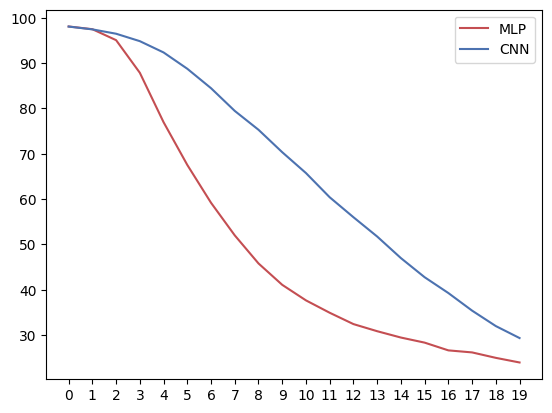

In [ ]:
plt.style.use('default')
plt.plot(resultadosPassaBaixaMLP, color='r', label='MLP')
plt.plot(resultadosPassaBaixaCNN, color='b', label='CNN')
plt.legend()
plt.xticks([x for x in range(20)])
plt.show()